<a href="https://colab.research.google.com/github/ianbounos/Optimal-Transport/blob/main/Discrete_Uniform_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimal Transport - Discrete Uniform Case


This notebook demonstrates the calculation of optimal transport between two sets of 2D points using the Earth Mover's Distance (EMD) algorithm. Optimal transport finds the most efficient way to move mass from one distribution to another, minimizing the cost based on a given distance metric.

It illustrates how, in the discrete uniform case, the Monge and Kantorovich solution are the same and the transference plan is just a permutation



In [3]:
pip install pot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 10.7 MB/s eta 0:00:00


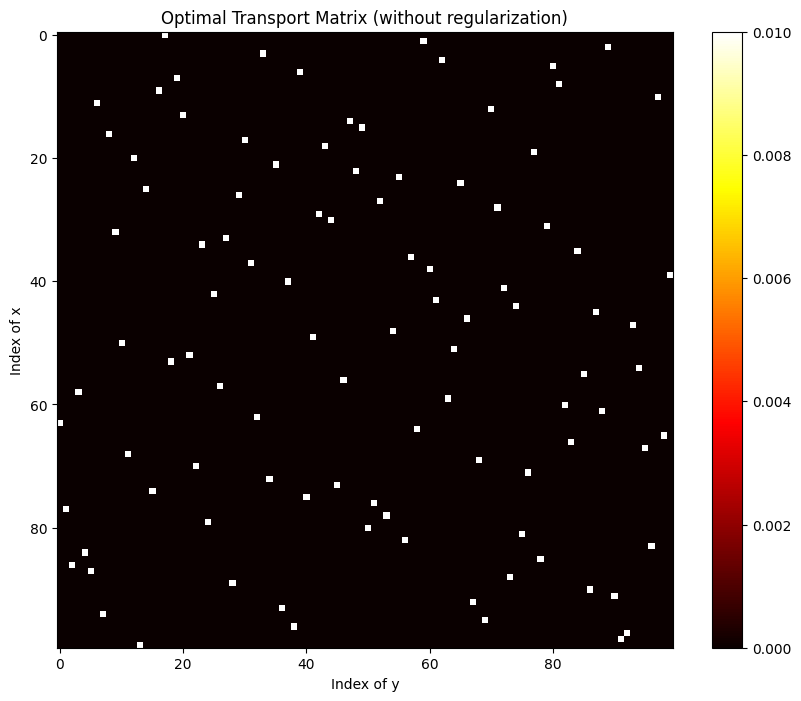

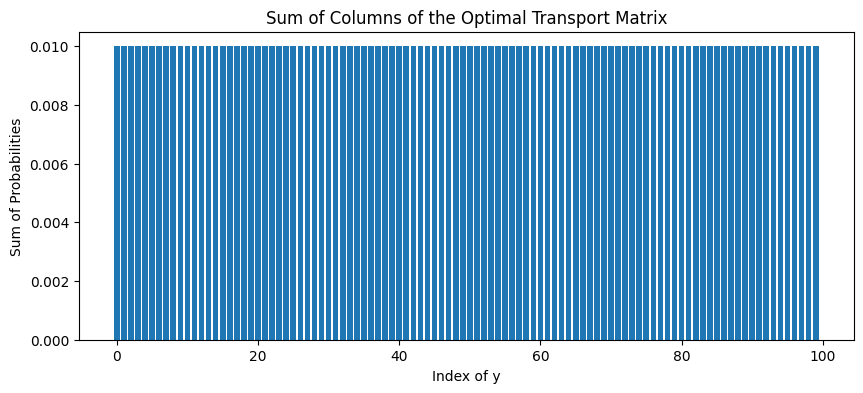

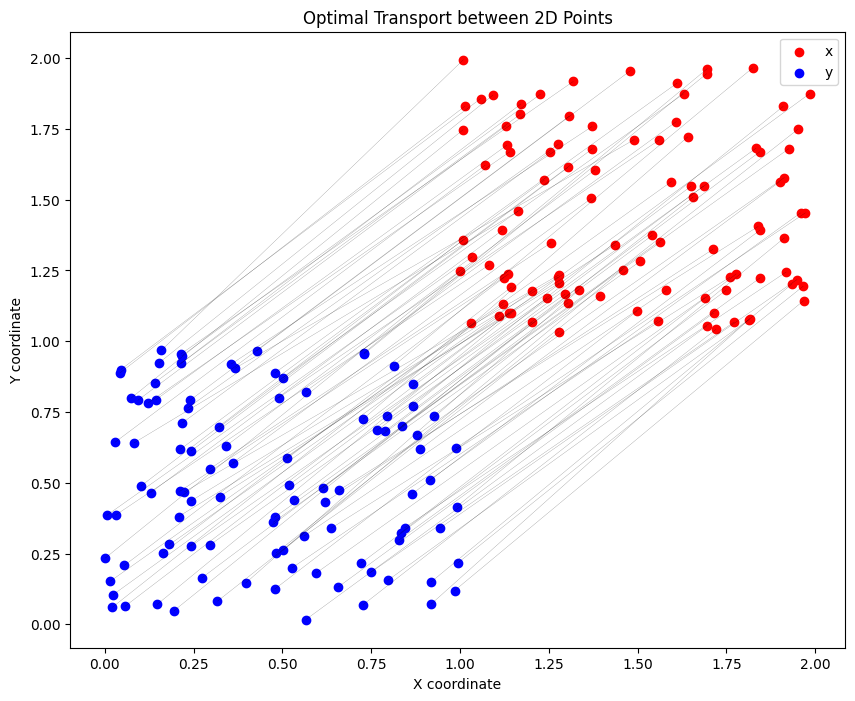

In [4]:
import numpy as np
import ot
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(13)

N = 100

# Uniform samples in 2D
x = np.random.uniform(1, 2, (N, 2))
y = np.random.uniform(0, 1, (N, 2))

# Define probability distributions (uniform in this case)
a = np.ones(N) / N  # Probability distribution for x
b = np.ones(N) / N  # Probability distribution for y

# Calculate the cost matrix (Euclidean distance in this case)
M = ot.dist(x, y)

# Calculate the optimal transport matrix using the linear transport algorithm (without regularization)
G = ot.emd(a, b, M)

# Sum the columns of the optimal transport matrix
column_sums = G.sum(axis=0)

# Visualize the optimal transport matrix
plt.figure(figsize=(10, 8))
plt.imshow(G, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Optimal Transport Matrix (without regularization)')
plt.xlabel('Index of y')
plt.ylabel('Index of x')
plt.show()

# Visualize the sum of the columns
plt.figure(figsize=(10, 4))
plt.bar(range(N), column_sums)
plt.title('Sum of Columns of the Optimal Transport Matrix')
plt.xlabel('Index of y')
plt.ylabel('Sum of Probabilities')
plt.show()

# Visualize the 2D points and transport
plt.figure(figsize=(10, 8))
for i in range(N):
    for j in range(N):
        if G[i, j] > 0:
            plt.plot([x[i, 0], y[j, 0]], [x[i, 1], y[j, 1]], 'k-', lw=G[i, j]*10)
plt.scatter(x[:, 0], x[:, 1], color='red', label='x')
plt.scatter(y[:, 0], y[:, 1], color='blue', label='y')
plt.title('Optimal Transport between 2D Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.show()


Now we make the animation with ffmpeg

In [10]:
!apt-get install -y ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


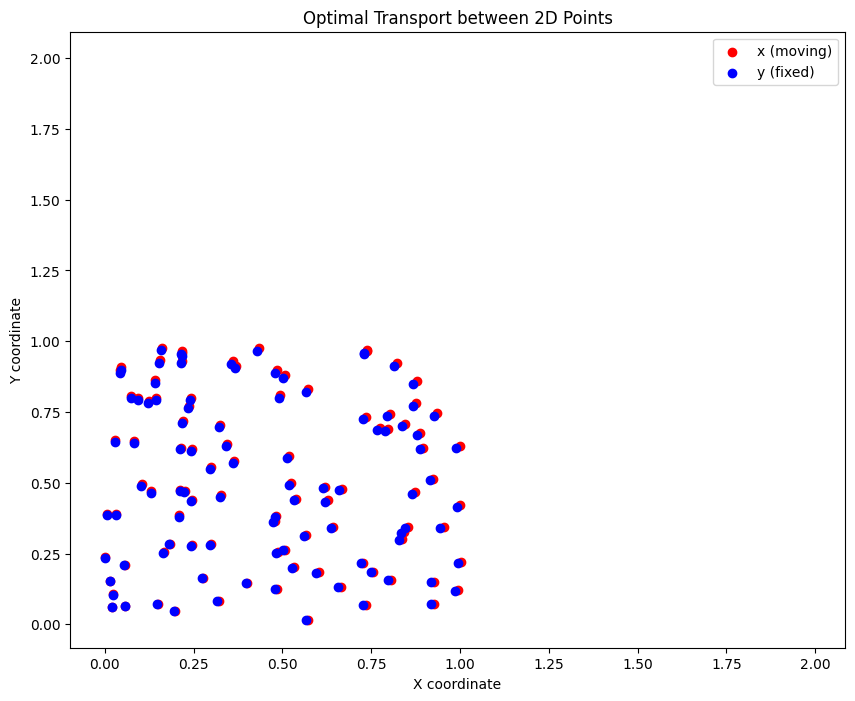

In [17]:

# Visualization setup
fig, ax = plt.subplots(figsize=(10, 8))

# Initial scatter plots
scatter_x = ax.scatter(x[:, 0], x[:, 1], color='red', label='x (moving)')
scatter_y = ax.scatter(y[:, 0], y[:, 1], color='blue', label='y (fixed)')

ax.set_title('Optimal Transport between 2D Points')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.legend()

# Store initial positions
initial_positions = x.copy()

transported_indices = np.argmax(G, axis=1)

final_positions = y.copy()[transported_indices]

# Calculate the final positions based on the transport matrix
for i in range(N):
    for j in range(N):
        if G[i, j] > 0:
            final_positions[i] += G[i, j] * y[j]

# Update function for animation
def update(frame):
    t = frame / 100  # interpolation parameter
    current_positions = (1 - t) * initial_positions + t * final_positions
    scatter_x.set_offsets(current_positions)
    return scatter_x,

# Create animation
ani = FuncAnimation(fig, update, frames=101, interval=100, blit=True)

# Save animation as MP4
ani.save('optimal_transport_discrete_uniform_case.mp4', writer=FFMpegWriter(fps=10))

# Display the animation in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())